In [1]:
import torch
from PIL import Image
import numpy as np

In [2]:
model = torch.hub.load('.', 'custom', path='./my_model_weights/best.pt', source='local')  # local repo

YOLOv5  2025-4-27 Python-3.10.14 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [3]:
model.names

{0: 'Potato', 1: 'Tomato'}

In [4]:
img_path = './can-you-eat-potato-leaves.jpg'

In [5]:
results = model(img_path, size=256) 

c:\Users\ASUS\Desktop\KisanAI\yolov5\.\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [6]:
results.print()  # print results

image 1/1: 668x1000 1 Potato
Speed: 35.8ms pre-process, 143.9ms inference, 202.8ms NMS per image at shape (1, 3, 192, 256)


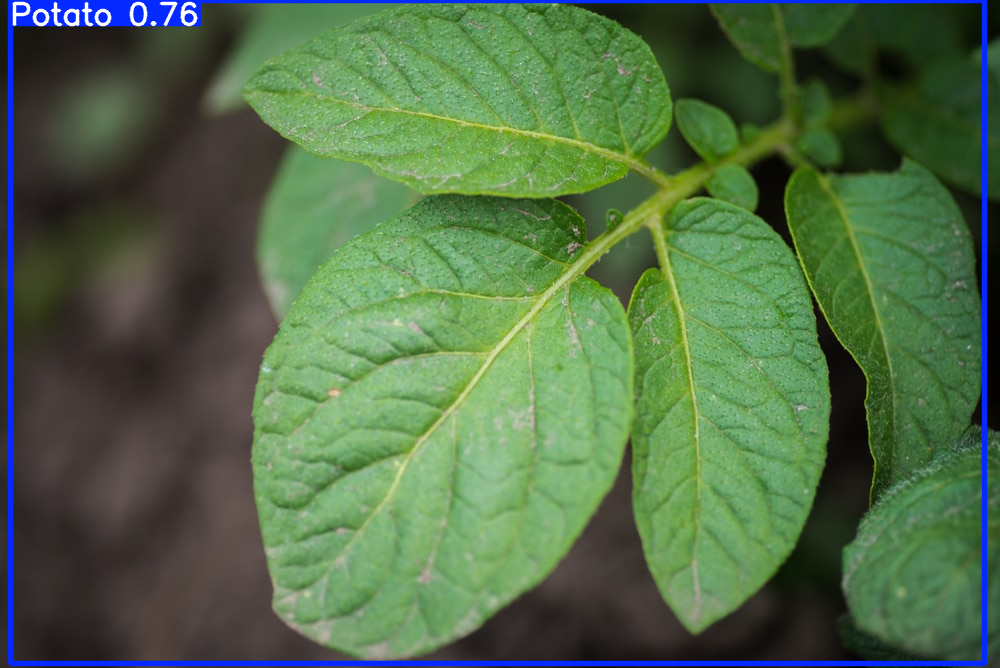

In [7]:
results.show()

In [8]:
results.print()

image 1/1: 668x1000 1 Potato
Speed: 35.8ms pre-process, 143.9ms inference, 202.8ms NMS per image at shape (1, 3, 192, 256)


In [9]:
types = results.xyxy[0][:, -1].unique()
print(f"Detected {len(types)} types of objects:")
for t in types:
    print(f" - {model.names[int(t)]}")


Detected 1 types of objects:
 - Potato


In [10]:
detected_class = results.xyxy[0][:, -1]
model.names[int(detected_class[0])]  

'Potato'